# **Project 3**
#### **PCA**


In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started 

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

1. Write a function to do the following: 
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. 
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **Answer: If a curve goes up meaning the covid case are going up in the scale of mean and if it goes down, it means the covid case are going down in the scale of the mean,A positive sign of value means that the value is higher than the mean and a negative sign of value means that the value is lower than the mean.**

In [ ]:
#1
import matplotlib.pyplot as plt
def plot_time_Series(data, country_list):
  len_= len(country_list)
  fig, ax = plt.subplots(len_,1, figsize = (20,20))
  for c in range(len_):
    ax[c].plot(cases_raw.loc[country_list[c]].values)
    ax[c].set_title(country_list[c], size = 20)


In [ ]:
from sklearn.preprocessing import StandardScaler
cases_raw_std = pd.DataFrame(StandardScaler().fit_transform(cases_raw),index=cases_raw.index.values,columns=cases_raw.columns) # Important!! Because the rows and columns becomes index numbers after standardscaler so we row names and column names back to the dataframe.

In [ ]:
cases_raw_std

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Afghanistan,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074146,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.241721,-0.241516,-0.241345,-0.241154,-0.240968,-0.240765,-0.240545,-0.240333,-0.240179,-0.240067,-0.239951,-0.239835,-0.239723,-0.239197,-0.239018,-0.238872,-0.238766,-0.238563,-0.238367,-0.238130,-0.238012,-0.237856,-0.237621,-0.237466,-0.237263,-0.237009,-0.236807,-0.236609,-0.236306,-0.236008,-0.235735,-0.235367,-0.235066,-0.234699,-0.234351,-0.233966,-0.233815,-0.233642,-0.233340,-0.233002
Albania,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.219168,-0.219162,-0.219111,-0.219086,-0.219109,-0.219113,-0.219096,-0.219079,-0.219031,-0.219014,-0.219010,-0.219039,-0.219105,-0.218781,-0.218829,-0.218875,-0.218896,-0.218916,-0.218971,-0.219048,-0.219171,-0.219288,-0.219390,-0.219465,-0.219609,-0.219727,-0.219870,-0.220031,-0.220195,-0.220316,-0.220430,-0.220551,-0.220699,-0.220851,-0.221055,-0.221214,-0.221373,-0.221532,-0.221699,-0.221891
Algeria,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.221704,-0.221645,-0.221535,-0.221449,-0.221414,-0.221356,-0.221277,-0.221211,-0.221123,-0.221073,-0.221014,-0.220983,-0.220986,-0.220583,-0.220550,-0.220532,-0.220495,-0.220438,-0.220416,-0.220408,-0.220450,-0.220490,-0.220516,-0.220513,-0.220602,-0.220635,-0.220657,-0.220721,-0.220776,-0.220804,-0.220840,-0.220867,-0.220914,-0.220960,-0.221075,-0.221132,-0.221196,-0.221268,-0.221335,-0.221425
Andorra,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.257181,-0.256976,-0.256751,-0.256555,-0.256388,-0.256191,-0.255990,-0.255781,-0.255571,-0.255419,-0.255264,-0.255146,-0.255057,-0.254615,-0.254523,-0.254439,-0.254355,-0.254266,-0.254174,-0.254127,-0.254137,-0.254156,-0.254162,-0.254158,-0.254226,-0.254259,-0.

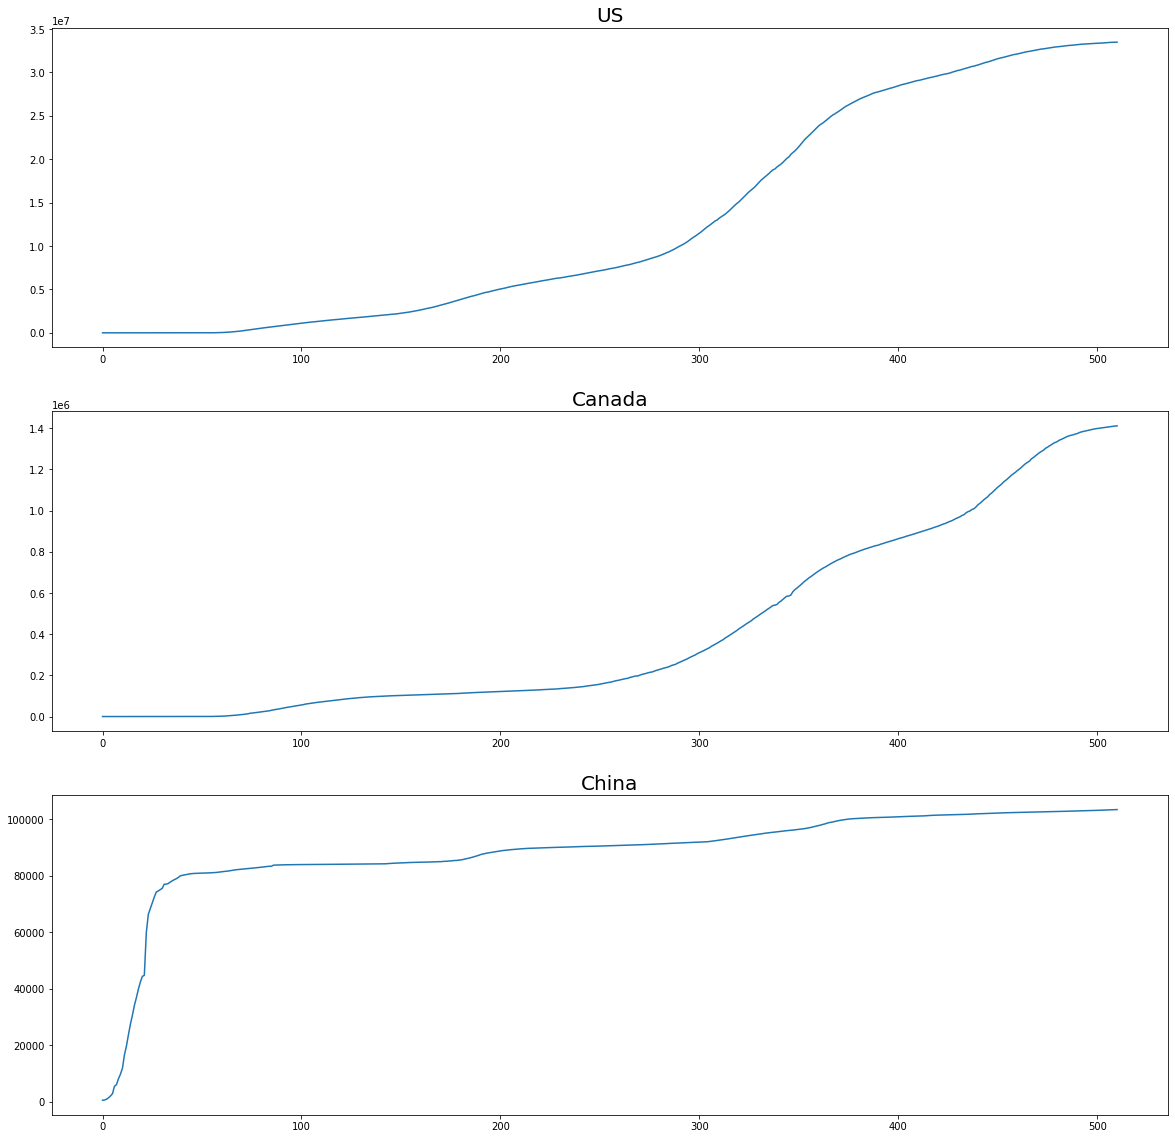

In [ ]:
plot_time_Series(cases_raw_std, ['US', 'Canada', 'China'])

In [ ]:
cases_raw.iloc[:,1].mean()

3.393782383419689

In [ ]:
cases_raw_std.iloc[:,1].mean()

-1.980281223975182e-16

# Part 2: Applying PCA 

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* 
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. 
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. 
4. How many PCs do you need to cover 99% of the dataset's variance?  **We need 4 PCs to cover 99% of th edataset's variance**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) .  Eigenfaces
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? 

In [ ]:
# 1 & 2

n,m = cases_raw_std.shape
#Calculate the covariance matrix C
import numpy as np
C = np.dot(cases_raw_std.T,cases_raw_std)/(n-1)

def get_sorted_eigen(df_cov):
  covariance = np.cov(df_cov.T)
  Eigenvalues, Eigenvectors = np.linalg.eigh(covariance)
  args = (-Eigenvalues).argsort()
  Eigenvalues = Eigenvalues[args]
  Eigenvectors = Eigenvectors[:,args]
  return Eigenvalues, Eigenvectors, covariance

  

In [ ]:
eigenValues, eigenVectors, covariance = get_sorted_eigen(cases_raw_std)
eigenVectors

array([[-0.00068142,  0.12313007,  0.03865575, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0006685 ,  0.12312809,  0.03867506, ..., -0.01714886,
        -0.01219969,  0.00360219],
       [-0.00070159,  0.12314123,  0.03858246, ...,  0.00342728,
         0.00692241,  0.0359155 ],
       ...,
       [-0.04721997, -0.00766504,  0.04392301, ...,  0.02302127,
         0.03574041, -0.01227926],
       [-0.04721007, -0.00768119,  0.04408039, ..., -0.01013053,
        -0.00237691,  0.0051138 ],
       [-0.0471996 , -0.00770528,  0.04430212, ...,  0.0420375 ,
        -0.05143621,  0.00381862]])

In [ ]:
covariance.shape #Checking the shape of the covariance

(511, 511)

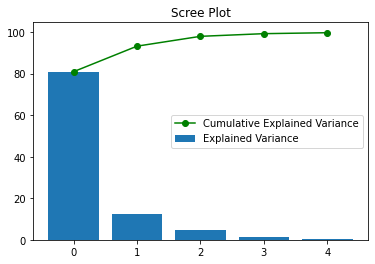

In [ ]:
##3
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

# Plotting the first 5 principal components effectivness 
plt.bar(range(5), expVar[0:5], label='Explained Variance')
plt.plot(cumExpVar[0:5], 'g-o', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()


In [ ]:
#4
cumExpVar
print('We need 4 Principal components to cover 99% of the dataset.')

We need 4 Principal components to cover 99% of the dataset.


In [ ]:
cases_raw.columns

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
       '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15'],
      dtype='object', length=511)

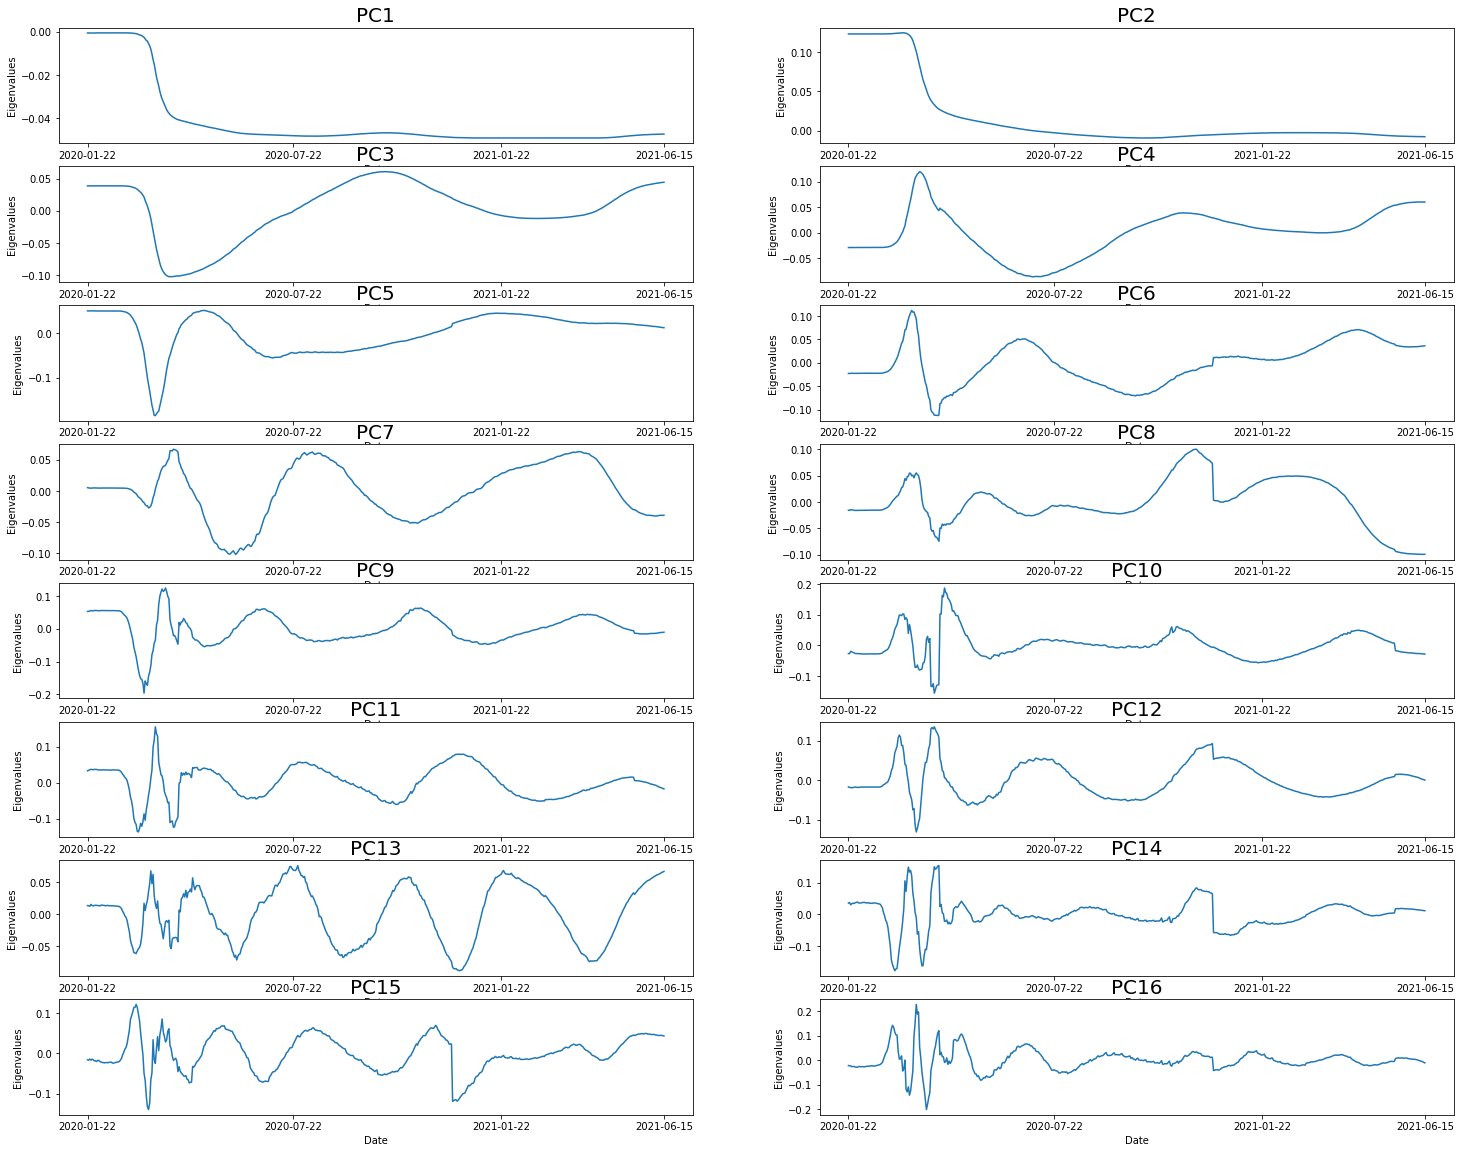

In [ ]:
#5
dates = cases_raw.columns.tolist()

fig, axes = plt.subplots(8,2,figsize = (25,20))

axes[0,0].plot(dates, eigenVectors[:,0])
axes[0,0].set_title('PC1', size = 20)

axes[0,1].plot(dates, eigenVectors[:,1])
axes[0,1].set_title('PC2', size = 20)

axes[1,0].plot(dates, eigenVectors[:,2])
axes[1,0].set_title('PC3', size = 20)

axes[1,1].plot(dates, eigenVectors[:,3])
axes[1,1].set_title('PC4', size = 20)

axes[2,0].plot(dates, eigenVectors[:,4])
axes[2,0].set_title('PC5', size = 20)

axes[2,1].plot(dates, eigenVectors[:,5])
axes[2,1].set_title('PC6', size = 20)

axes[3,0].plot(dates, eigenVectors[:,6])
axes[3,0].set_title('PC7', size = 20)

axes[3,1].plot(dates, eigenVectors[:,7])
axes[3,1].set_title('PC8', size = 20)

axes[4,0].plot(dates, eigenVectors[:,8])
axes[4,0].set_title('PC9', size = 20)

axes[4,1].plot(dates, eigenVectors[:,9])
axes[4,1].set_title('PC10', size = 20)

axes[5,0].plot(dates, eigenVectors[:,10])
axes[5,0].set_title('PC11', size = 20)

axes[5,1].plot(dates, eigenVectors[:,11])
axes[5,1].set_title('PC12', size = 20)

axes[6,0].plot(dates, eigenVectors[:,12])
axes[6,0].set_title('PC13', size = 20)

axes[6,1].plot(dates, eigenVectors[:,13])
axes[6,1].set_title('PC14', size = 20)

axes[7,0].plot(dates, eigenVectors[:,14])
axes[7,0].set_title('PC15', size = 20)

axes[7,1].plot(dates, eigenVectors[:,15])
axes[7,1].set_title('PC16', size = 20)

date_picked = ['2020-01-22', '2020-07-22','2021-01-22','2021-06-15']
for ax in axes.flat:
  ax.set(xlabel='Date', ylabel='Eigenvalues')
  ax.set_xticks(date_picked)

In [ ]:
print('We can see the difference between the first few graphs and the rest of the graphs.')
print('We can see that the lines have more waves after PC4 which means the eigenvalues are getting more fluctuating. This is because after PC4, 99% of the variance are been explained')

We can see the difference between the first few graphs and the rest of the graphs.
We can see that the lines have more waves after PC4 which means the eigenvalues are getting more fluctuating. This is because after PC4, 99% of the variance are been explained


# Part 3: Data reconstruction 

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. 
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. 
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. 
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) 

Test your function using the `US`, `Canada`, and `China` as inputs. 


In [ ]:
scale = StandardScaler().fit(cases_raw) # in order to use inverse_transform
import math
def plot_country_figures(original_df, country_name):
  fig, axes = plt.subplots(2,2, figsize = (25,20))

  #First figure
  axes[0,0].plot(original_df.loc[country_name].values)
  axes[0,0].set_title(country_name)

  #Second figure

    #Reconstruction with only PC1
  W = eigenVectors[:,0:1]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1')
  axes[0,1].set_title('Incremental_Reconstruction', size = 18)
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 and PC2
  W = eigenVectors[:,0:2]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1&2')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC4
  W = eigenVectors[:,0:4]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to4')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC8
  W = eigenVectors[:,0:8]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to8')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC16
  W = eigenVectors[:,0:16]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to16')
  axes[0,1].legend(loc = 'upper left')

  #Third figure
  #Here, I chose the best reconstruction as PC1 to PC16'
  W = eigenVectors[:,0:16]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[1,0].plot(cases_raw.columns, original_df.loc[country_name] - ReconX_original)
  axes[1,0].set_title('Residual_error_with_best_reconstruction', size = 18)
  axes[1,0].legend(loc = 'upper left')
  date_picked_ticks = ['2020-01-22', '2020-07-22','2021-01-22','2021-06-15']
  axes[1,0].set(xlabel='Date', ylabel='Residual error')
  axes[1,0].set_xticks(date_picked_ticks)

  #Forth figure
  x = list(range(1,11))
  RMSE_list = []

  for i in range(1,11):
    W = eigenVectors[:,0:i]
    ProjX = np.dot(cases_raw_std.loc[country_name], W)
    ReconX = np.dot(ProjX, W.T)
    ReconX_original = scale.inverse_transform(ReconX)
    SE =sum((cases_raw.loc[country_name] - ReconX_original)**2)/ReconX_original.size
    RMSE = math.sqrt(SE)
    RMSE_list.append(RMSE)
    #RMSE = mean_squared_error(original_df.loc[country_name], ReconX_original, squared=False)
  
  axes[1,1].plot(x, RMSE_list)
  axes[1,1].set_title('RMSE_PC1to10', size = 18)
    
    


No handles with labels found to put in legend.


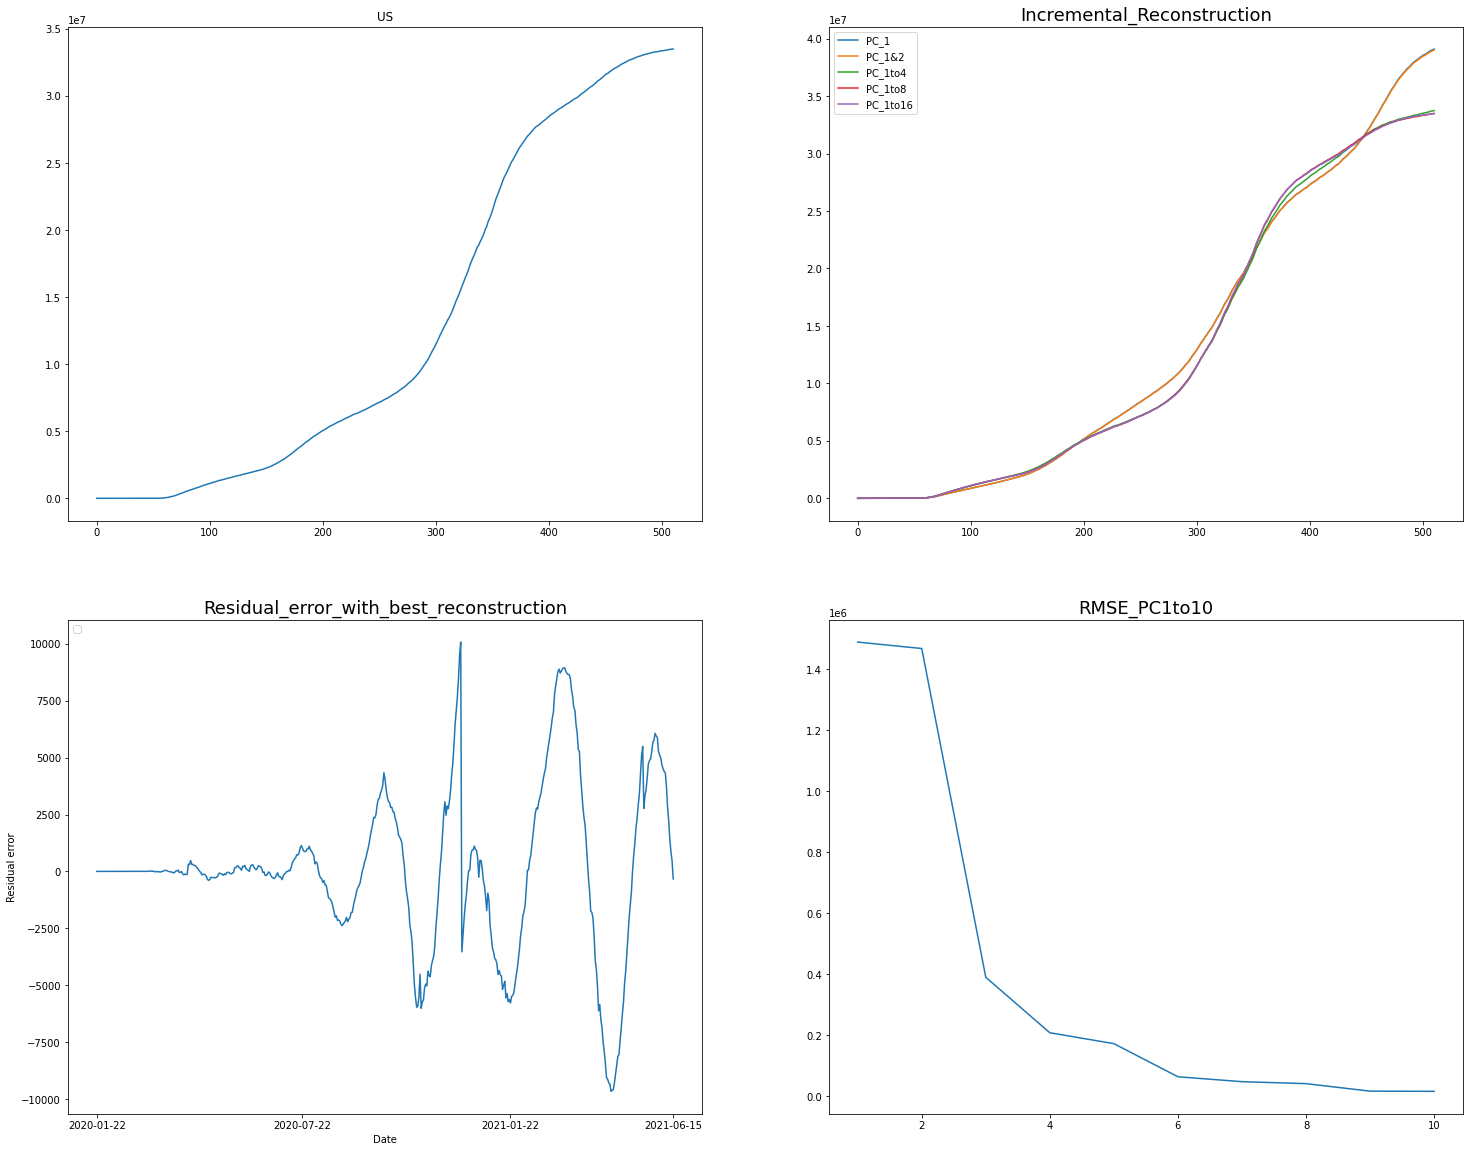

In [ ]:
plot_country_figures(cases_raw, 'US')

No handles with labels found to put in legend.


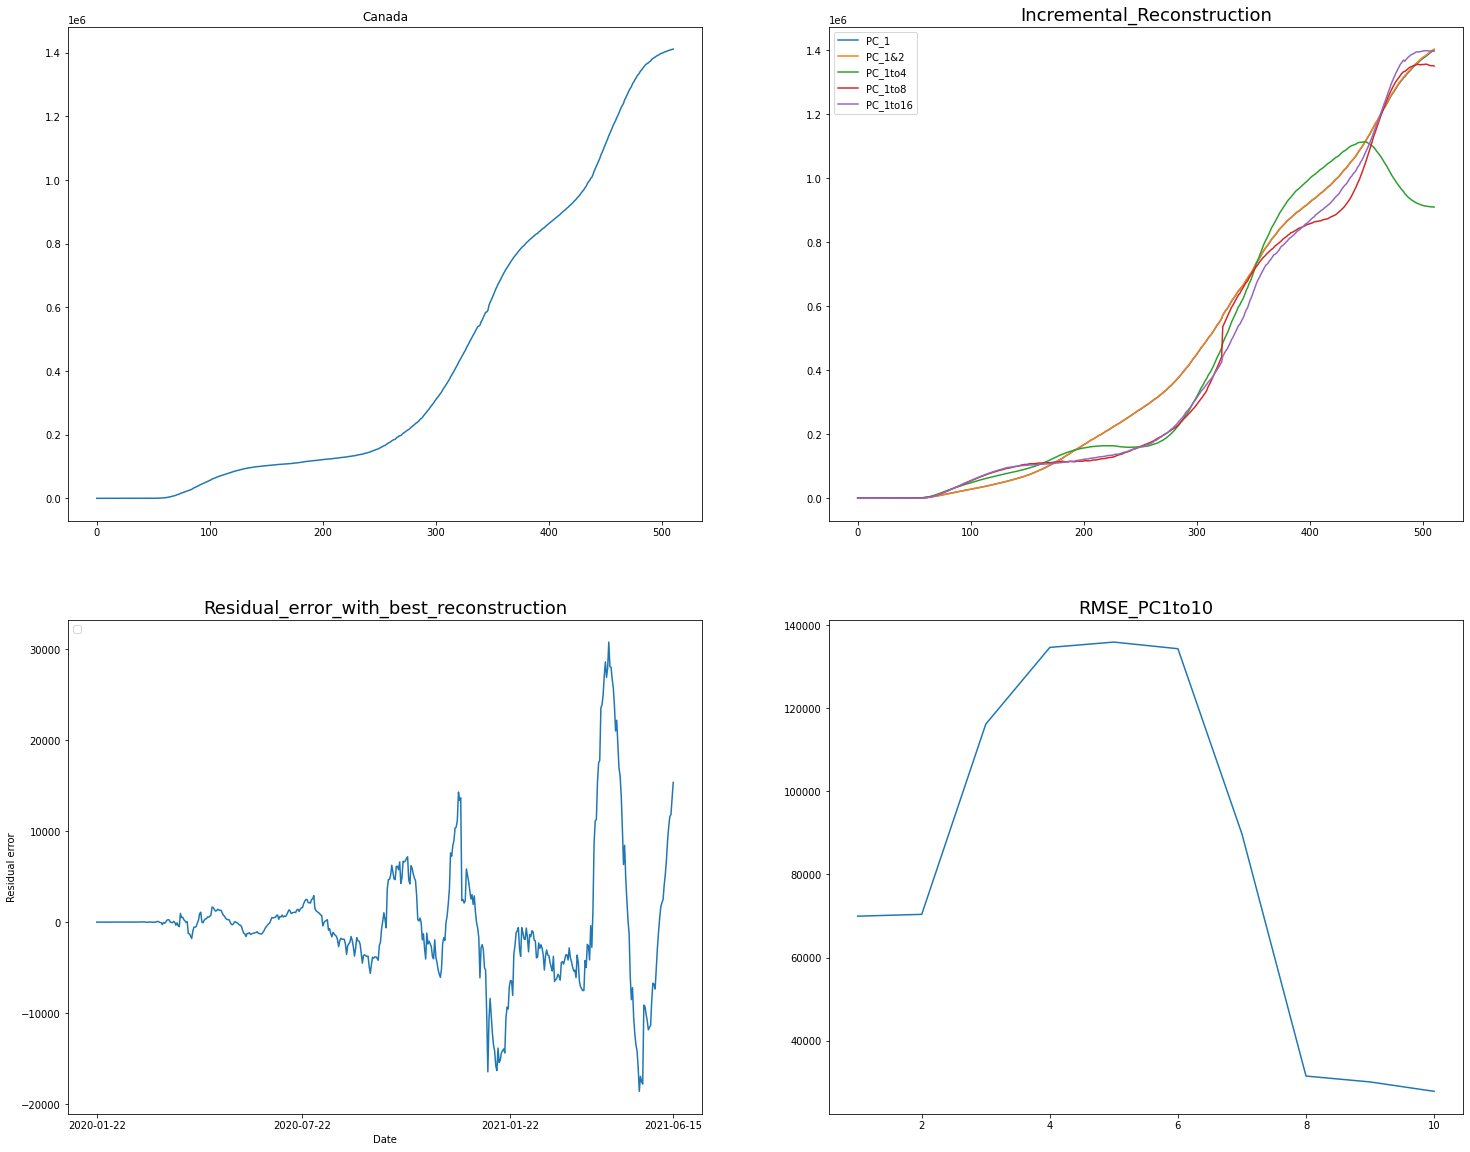

In [ ]:
plot_country_figures(cases_raw, 'Canada')

No handles with labels found to put in legend.


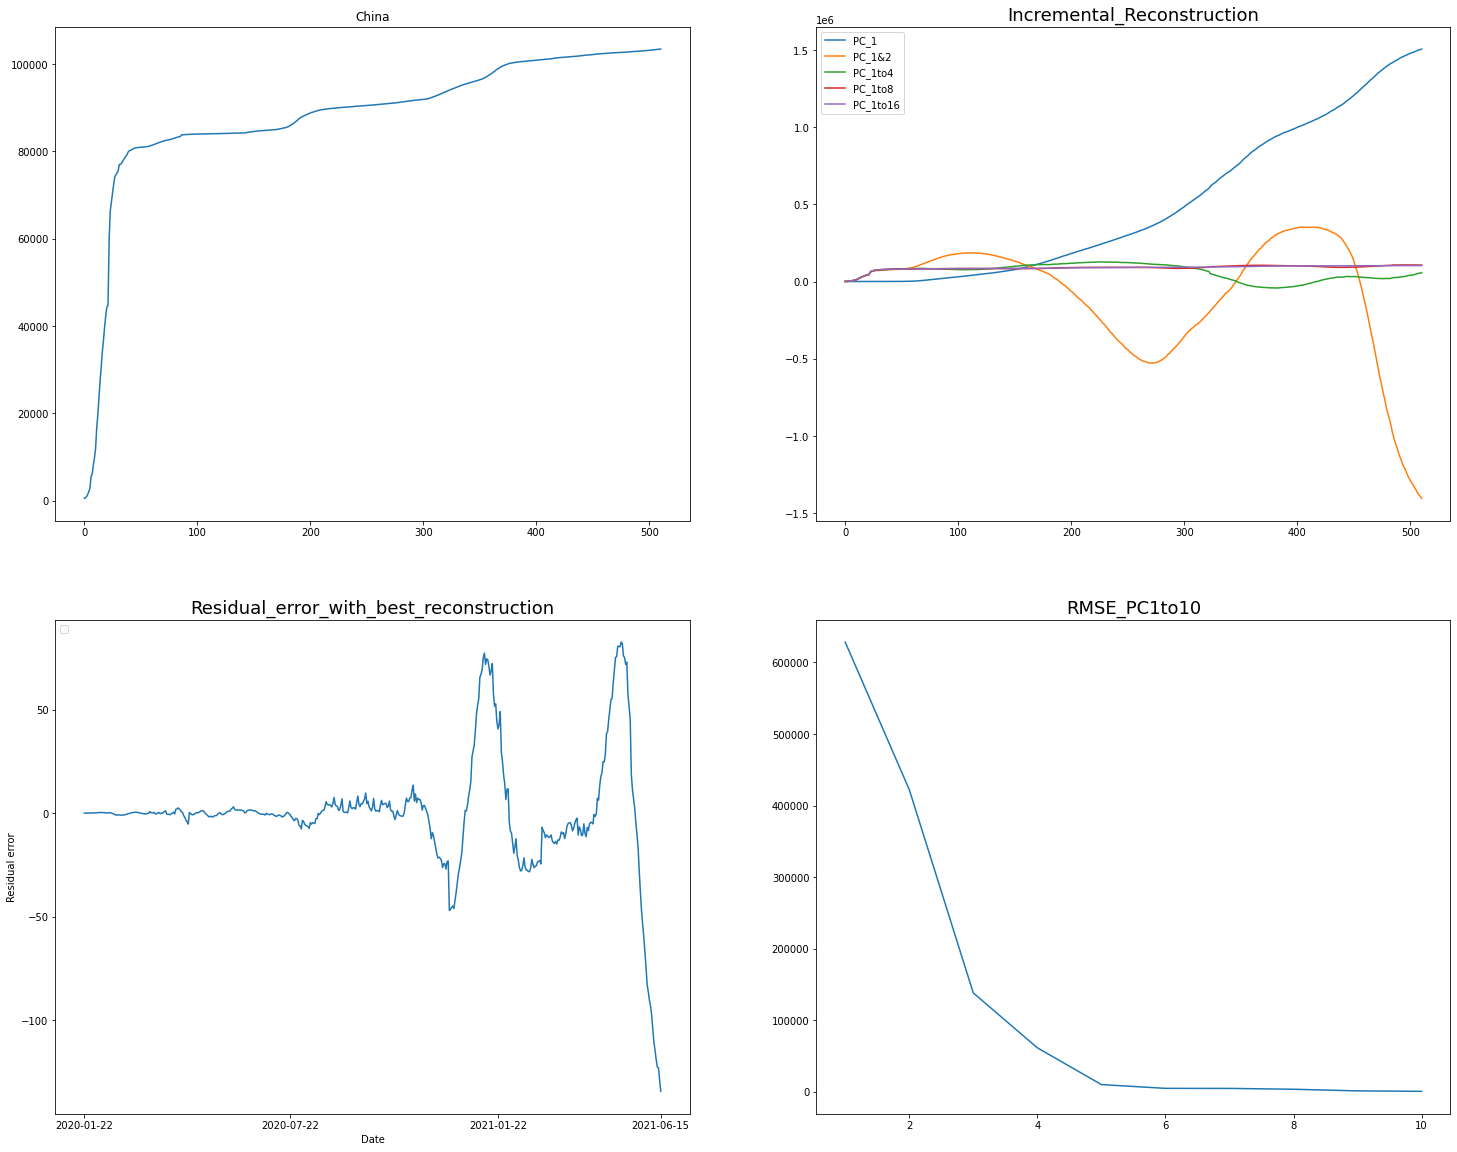

In [ ]:
plot_country_figures(cases_raw, 'China')

# Part 4: SVD 
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. 

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. 

**Answer: Standardization is needed for this part since we are comparing the result between part 3 & 4 so the input should be the same. Covariance computation is not required here because SVD computations is not involved with calculating the covariance matrix. The result(four figures) in part3 & 4 are very similar because the input data are standardized so both of the input data have mean of zero and standard deviation of 1.**



In [ ]:
#
def get_svd_eigenvectors(df_std):
  Eigenvectors, s, v = np.linalg.svd(df_std.T)
  n, m = df_std.shape
  Eigenvalues = s**2/(n-1)
  args = (-Eigenvalues).argsort() # sorted eigenvalues indices
  Eigenvectors = Eigenvectors[:,args]
  return Eigenvectors

In [ ]:
EigenVectors = get_svd_eigenvectors(cases_raw_std)
EigenVectors

array([[-0.00068142,  0.12313007, -0.03865575, ..., -0.01246981,
         0.0126639 ,  0.02599471],
       [-0.0006685 ,  0.12312809, -0.03867506, ...,  0.00447153,
         0.00056108, -0.00566428],
       [-0.00070159,  0.12314123, -0.03858246, ..., -0.01917331,
         0.01424946,  0.02852729],
       ...,
       [-0.04721997, -0.00766504, -0.04392301, ...,  0.00529168,
         0.01493486, -0.00329629],
       [-0.04721007, -0.00768119, -0.04408039, ...,  0.03722908,
        -0.05675699, -0.00764808],
       [-0.0471996 , -0.00770528, -0.04430212, ...,  0.02616608,
        -0.01581924, -0.02939315]])

In [ ]:
scale = StandardScaler().fit(cases_raw) # in order to use inverse_transform
import math
def plot_country_figures(original_df, country_name):
  fig, axes = plt.subplots(2,2, figsize = (25,20))

  #First figure
  axes[0,0].plot(original_df.loc[country_name].values)
  axes[0,0].set_title(country_name)

  #Second figure

    #Reconstruction with only PC1
  W = EigenVectors[:,0:1]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1')
  axes[0,1].set_title('Incremental_Reconstruction', size = 18)
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 and PC2
  W = EigenVectors[:,0:2]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1&2')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC4
  W = EigenVectors[:,0:4]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to4')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC8
  W = EigenVectors[:,0:8]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to8')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC16
  W = EigenVectors[:,0:16]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to16')
  axes[0,1].legend(loc = 'upper left')

  #Third figure
  #Here, I chose the best reconstruction as PC1 to PC16'
  W = EigenVectors[:,0:16]
  ProjX = np.dot(cases_raw_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[1,0].plot(cases_raw.columns, original_df.loc[country_name] - ReconX_original)
  axes[1,0].set_title('Residual_error_with_best_reconstruction', size = 18)
  axes[1,0].legend(loc = 'upper left')
  date_picked_ticks = ['2020-01-22', '2020-07-22','2021-01-22','2021-06-15']
  axes[1,0].set(xlabel='Date', ylabel='Residual error')
  axes[1,0].set_xticks(date_picked_ticks)

  #Forth figure
  x = list(range(1,11))
  RMSE_list = []

  for i in range(1,11):
    W = EigenVectors[:,0:i]
    ProjX = np.dot(cases_raw_std.loc[country_name], W)
    ReconX = np.dot(ProjX, W.T)
    ReconX_original = scale.inverse_transform(ReconX)
    SE =sum((cases_raw.loc[country_name] - ReconX_original)**2)/ReconX_original.size
    RMSE = math.sqrt(SE)
    RMSE_list.append(RMSE)
    #RMSE = mean_squared_error(original_df.loc[country_name], ReconX_original, squared=False)
  
  axes[1,1].plot(x, RMSE_list)
  axes[1,1].set_title('RMSE_PC1to10', size = 18)

No handles with labels found to put in legend.


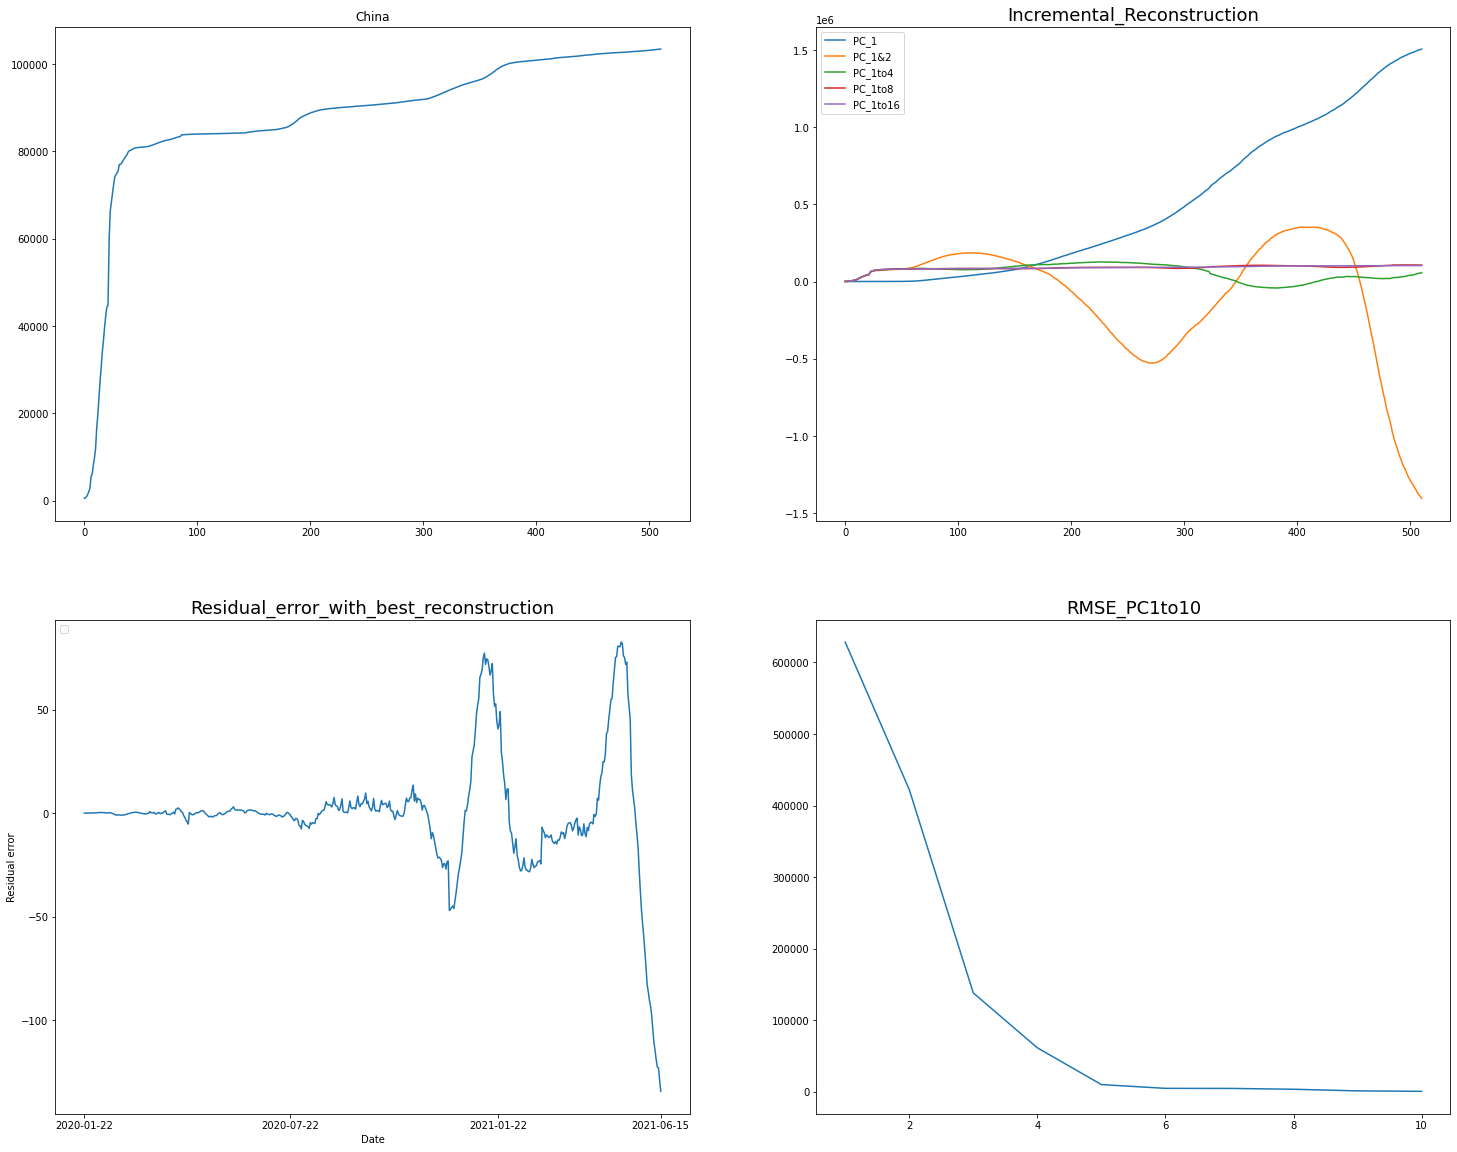

In [ ]:
plot_country_figures(cases_raw, 'China')

No handles with labels found to put in legend.


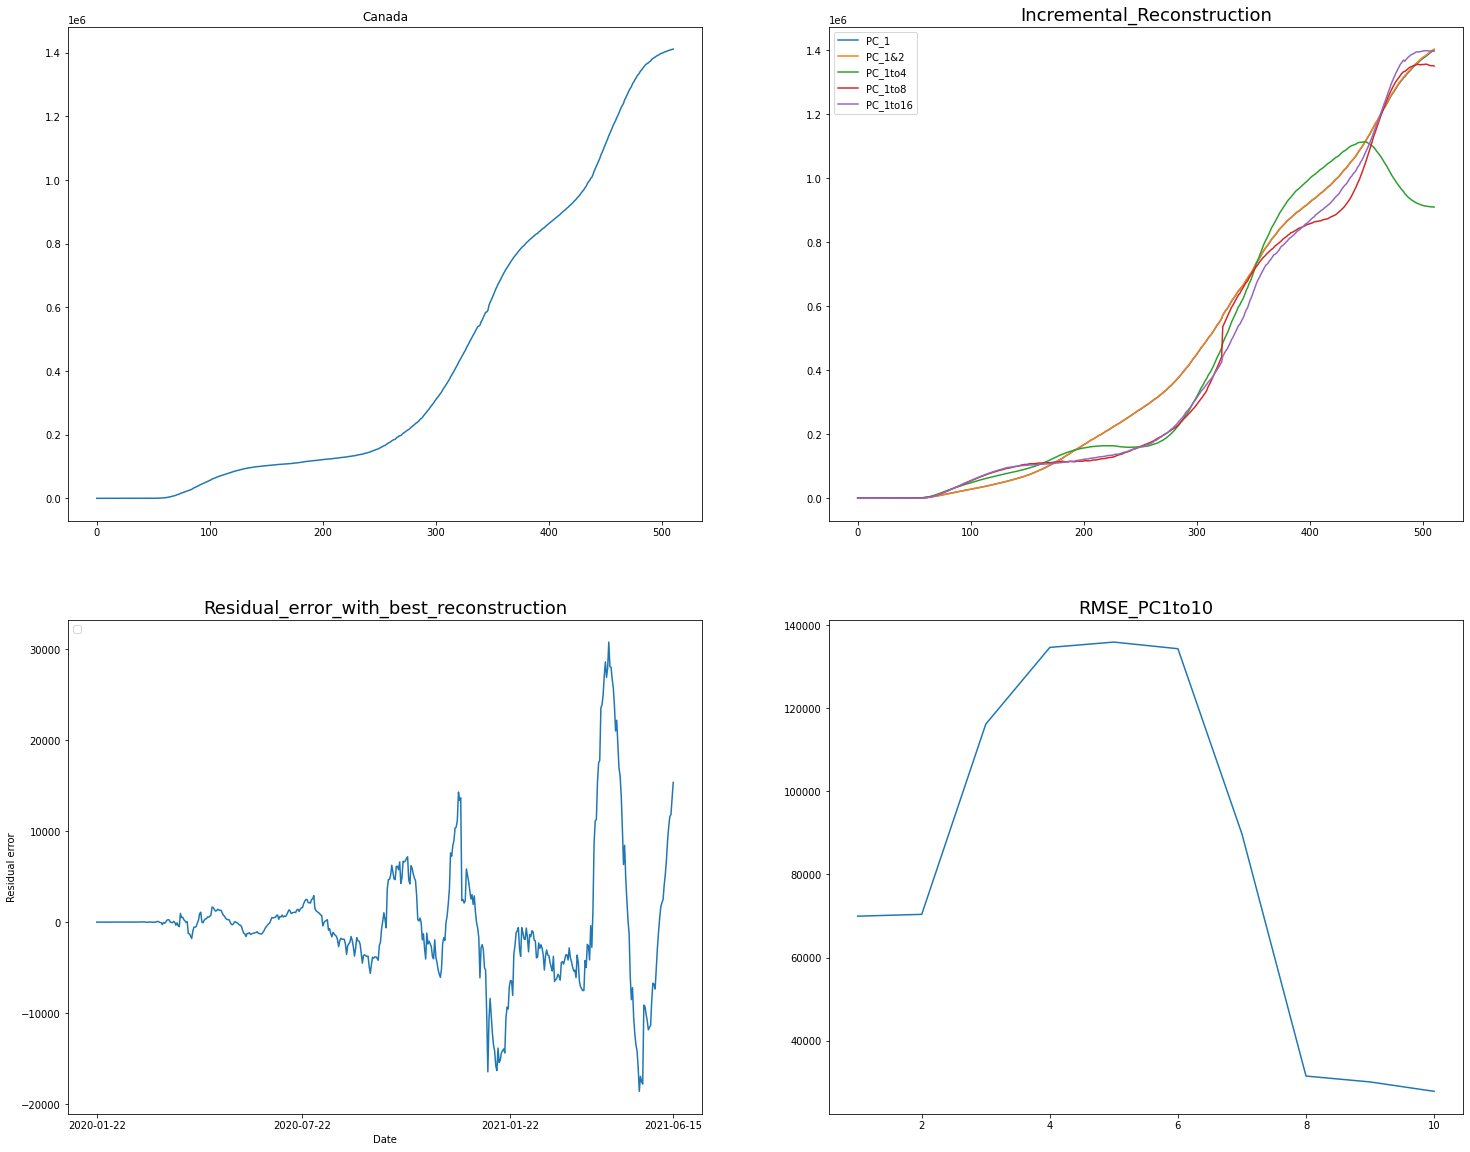

In [ ]:
plot_country_figures(cases_raw, 'Canada')

No handles with labels found to put in legend.


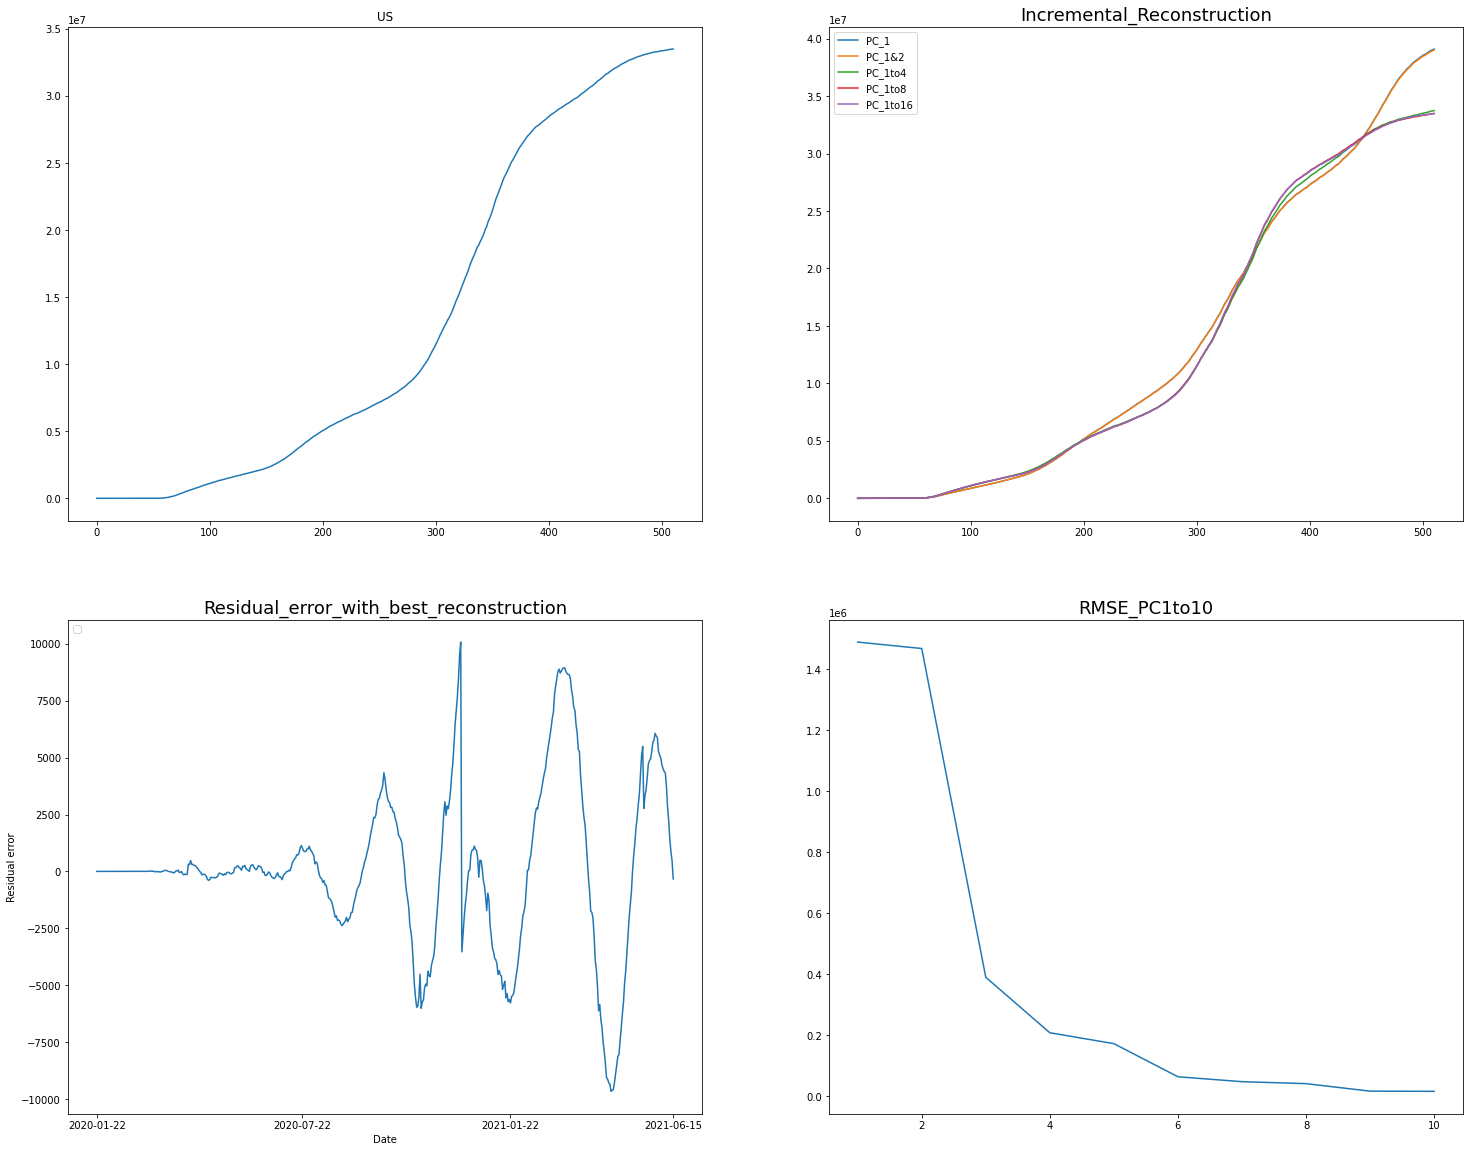

In [ ]:
plot_country_figures(cases_raw, 'US')

# Part 5: Let's collect a more recent dataset! 
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). 

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. 


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [ ]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()


Saving countries.csv to countries (1).csv


In [ ]:
countries = pd.read_csv('countries.csv', index_col=0)
countries

,2020/1/22,2020/1/23,2020/1/24,2020/1/25,2020/1/26,2020/1/27,2020/1/28,2020/1/29,2020/1/30,2020/1/31,2020/2/1,2020/2/2,2020/2/3,2020/2/4,2020/2/5,2020/2/6,2020/2/7,2020/2/8,2020/2/9,2020/2/10,2020/2/11,2020/2/12,2020/2/13,2020/2/14,2020/2/15,2020/2/16,2020/2/17,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,2020/2/26,2020/2/27,2020/2/28,2020/2/29,2020/3/1,...,2021/9/25,2021/9/26,2021/9/27,2021/9/28,2021/9/29,2021/9/30,2021/10/1,2021/10/2,2021/10/3,2021/10/4,2021/10/5,2021/10/6,2021/10/7,2021/10/8,2021/10/9,2021/10/10,2021/10/11,2021/10/12,2021/10/13,2021/10/14,2021/10/15,2021/10/16,2021/10/17,2021/10/18,2021/10/19,2021/10/20,2021/10/21,2021/10/22,2021/10/23,2021/10/24,2021/10/25,2021/10/26,2021/10/27,2021/10/28,2021/10/29,2021/10/30,2021/10/31,2021/11/1,2021/11/2,2021/11/3
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8891,8934,8988,9016,9039,9067,9111,9139,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,952

In [ ]:
def get_svd_eigenvectors(df_std):
  Eigenvectors, s, v = np.linalg.svd(df_std.T)
  n, m = df_std.shape
  Eigenvalues = s**2/(n-1)
  args = (-Eigenvalues).argsort() # sorted eigenvalues indices
  Eigenvectors = Eigenvectors[:,args]
  return Eigenvectors

In [ ]:
EigenVectors_5 = get_svd_eigenvectors(countries)
EigenVectors_5

array([[-2.36163306e-09,  3.12083259e-08, -2.88283799e-07, ...,
        -8.09941426e-05,  4.07757600e-05, -1.31844699e-04],
       [-2.62439017e-09,  3.56047453e-08, -3.36696663e-07, ...,
        -9.17096819e-05,  2.59124216e-05, -1.76788234e-04],
       [-4.45690855e-09,  5.56491399e-08, -4.97228165e-07, ...,
        -2.20390341e-04,  7.24447537e-05, -4.56661518e-04],
       ...,
       [-7.58228113e-02, -8.71012859e-03,  1.20056227e-01, ...,
        -8.10760625e-03,  2.90568707e-02,  4.94677027e-03],
       [-7.59132965e-02, -8.33704635e-03,  1.21322222e-01, ...,
        -2.70203630e-03, -3.18010878e-02, -3.39446011e-03],
       [-7.60127740e-02, -7.78876831e-03,  1.22503367e-01, ...,
        -5.52951980e-04, -2.34792466e-03, -7.95360817e-02]])

In [ ]:
countries_std = pd.DataFrame(StandardScaler().fit_transform(countries),index=countries.index.values,columns=countries.columns)

scale = StandardScaler().fit(countries) # in order to use inverse_transform
import math
def plot_country_figures_5(original_df, country_name):
  fig, axes = plt.subplots(2,2, figsize = (25,20))

  #First figure
  axes[0,0].plot(original_df.loc[country_name].values)
  axes[0,0].set_title(country_name)

  #Second figure

    #Reconstruction with only PC1
  W = EigenVectors_5[:,0:1]
  ProjX = np.dot(countries_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1')
  axes[0,1].set_title('Incremental_Reconstruction', size = 18)
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 and PC2
  W = EigenVectors_5[:,0:2]
  ProjX = np.dot(countries_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1&2')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC4
  W = EigenVectors_5[:,0:4]
  ProjX = np.dot(countries_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to4')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC8
  W = EigenVectors_5[:,0:8]
  ProjX = np.dot(countries_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to8')
  axes[0,1].legend(loc = 'upper left')

    #Reconstruction with PC1 to PC16
  W = EigenVectors_5[:,0:16]
  ProjX = np.dot(countries_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[0,1].plot(ReconX_original, label = 'PC_1to16')
  axes[0,1].legend(loc = 'upper left')

  #Third figure
  #Here, I chose the best reconstruction as PC1 to PC16'
  W = EigenVectors_5[:,0:16]
  ProjX = np.dot(countries_std.loc[country_name], W)
  ReconX = np.dot(ProjX, W.T)
  ReconX_original = scale.inverse_transform(ReconX)
  axes[1,0].plot(countries.columns, original_df.loc[country_name] - ReconX_original)
  axes[1,0].set_title('Residual_error_with_best_reconstruction', size = 18)
  axes[1,0].legend(loc = 'upper left')
  date_picked_ticks = ['2020-01-22', '2020-07-22','2021-01-22','2021-06-15']
  axes[1,0].set(xlabel='Date', ylabel='Residual error')
  axes[1,0].set_xticks(date_picked_ticks)

  #Forth figure
  x = list(range(1,11))
  RMSE_list = []

  for i in range(1,11):
    W = EigenVectors_5[:,0:i]
    ProjX = np.dot(countries_std.loc[country_name], W)
    ReconX = np.dot(ProjX, W.T)
    ReconX_original = scale.inverse_transform(ReconX)
    SE =sum((countries.loc[country_name] - ReconX_original)**2)/ReconX_original.size
    RMSE = math.sqrt(SE)
    RMSE_list.append(RMSE)
    #RMSE = mean_squared_error(original_df.loc[country_name], ReconX_original, squared=False)
  
  axes[1,1].plot(x, RMSE_list)
  axes[1,1].set_title('RMSE_PC1to10', size = 18)

No handles with labels found to put in legend.


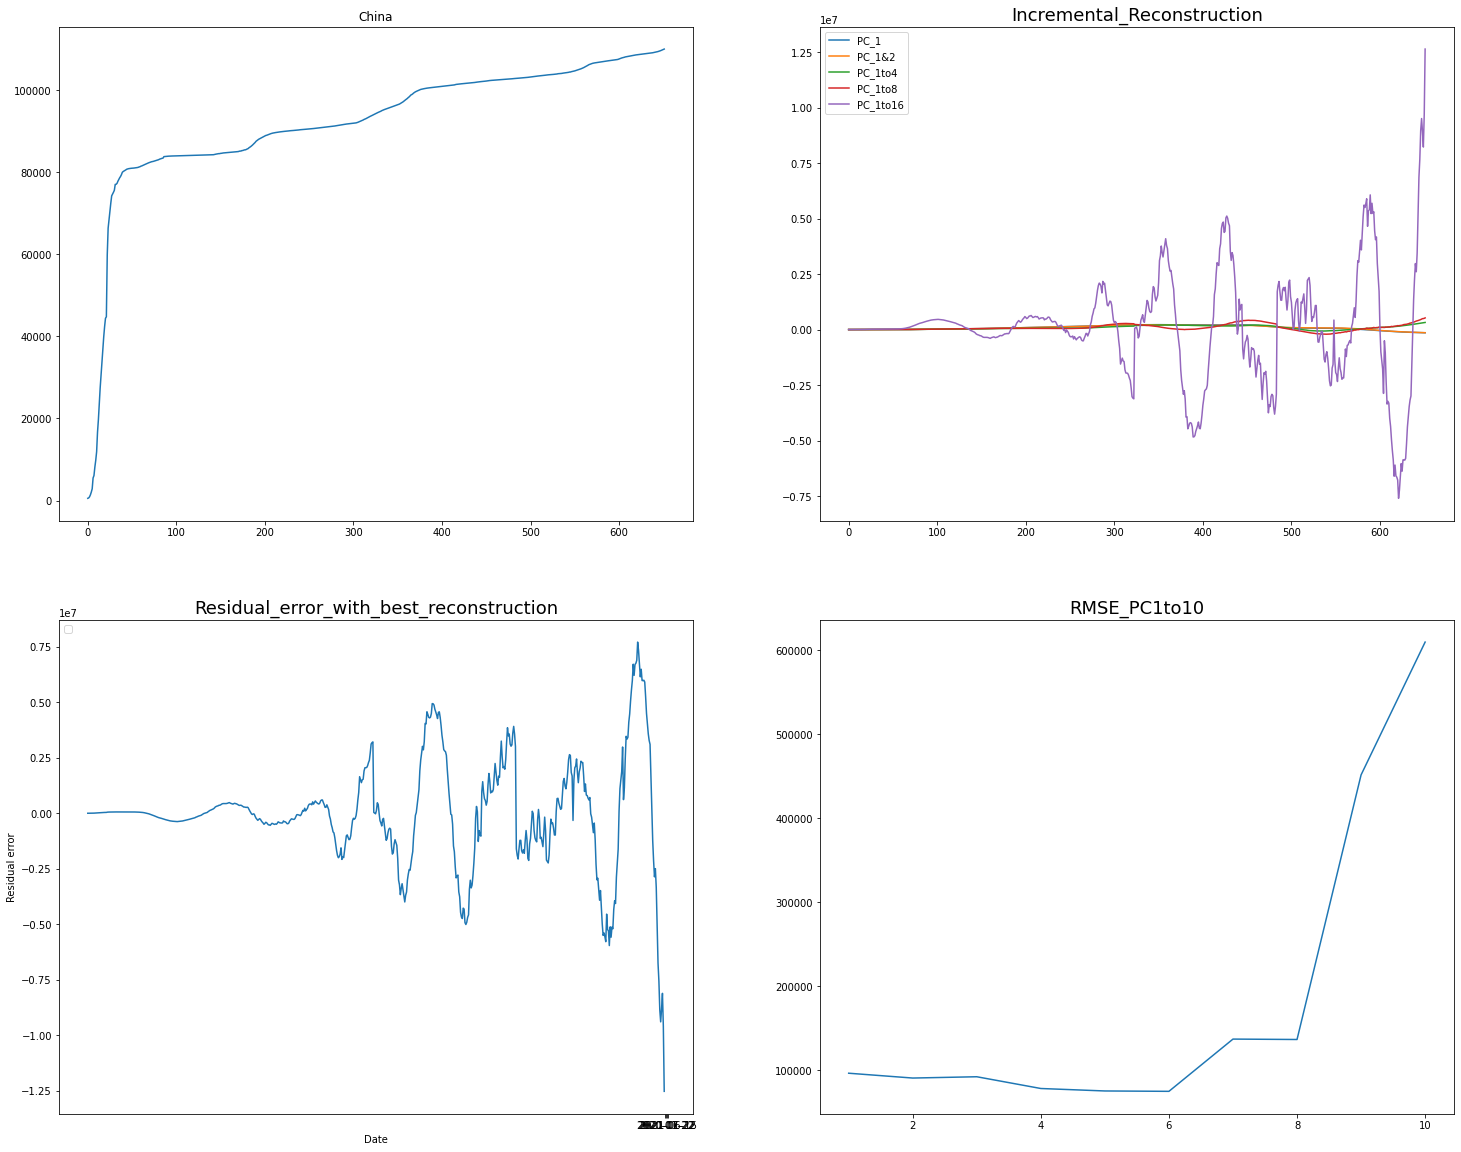

In [ ]:
plot_country_figures_5(countries, 'China')

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

